In [1]:
import numpy as np

n_inputs = 30  
n_hidden = 10  
n_outputs = 3  

learning_rate = 0.1
n_iterations = 10000

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

A = np.array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0])
B = np.array([1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])
C = np.array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

target_A = np.array([1, 0, 0])  
target_B = np.array([0, 1, 0])  
target_C = np.array([0, 0, 1])  

inputs = np.array([A, B, C])  
targets = np.array([target_A, target_B, target_C])

weights1 = np.random.rand(n_inputs, n_hidden)  
weights2 = np.random.rand(n_hidden, n_outputs)  
bias1 = np.zeros((1, n_hidden))  
bias2 = np.zeros((1, n_outputs))  

for _ in range(n_iterations):
    hidden_layer = sigmoid(np.dot(inputs, weights1) + bias1)  
    output_layer = sigmoid(np.dot(hidden_layer, weights2) + bias2)  

    output_error = targets - output_layer  
    output_delta = output_error * sigmoid_derivative(output_layer)  

    hidden_error = np.dot(output_delta, weights2.T)  
    hidden_delta = hidden_error * sigmoid_derivative(hidden_layer)  

    weights2 += learning_rate * np.dot(hidden_layer.T, output_delta)  
    weights1 += learning_rate * np.dot(inputs.T, hidden_delta)  
    bias2 += learning_rate * np.sum(output_delta, axis=0, keepdims=True)  
    bias1 += learning_rate * np.sum(hidden_delta, axis=0, keepdims=True)  

def test_network(image):
    hidden_layer = sigmoid(np.dot(image, weights1) + bias1)  
    output_layer = sigmoid(np.dot(hidden_layer, weights2) + bias2)  
    return output_layer
    
print("Output for A:", test_network(A))
print("Output for B:", test_network(B))
print("Output for C:", test_network(C))

Output for A: [[0.95727331 0.0354228  0.03629777]]
Output for B: [[0.02656529 0.96130537 0.01582232]]
Output for C: [[0.03463763 0.01578463 0.95914142]]


Epoch 0, Loss: 0.6389, Accuracy: 0.3333
Epoch 100, Loss: 0.2225, Accuracy: 0.3333
Epoch 200, Loss: 0.2223, Accuracy: 0.3333
Epoch 300, Loss: 0.2221, Accuracy: 0.3333
Epoch 400, Loss: 0.2220, Accuracy: 0.3333
Epoch 500, Loss: 0.2219, Accuracy: 0.3333
Epoch 600, Loss: 0.2217, Accuracy: 0.3333
Epoch 700, Loss: 0.2216, Accuracy: 0.3333
Epoch 800, Loss: 0.2212, Accuracy: 0.6667
Epoch 900, Loss: 0.2206, Accuracy: 0.6667


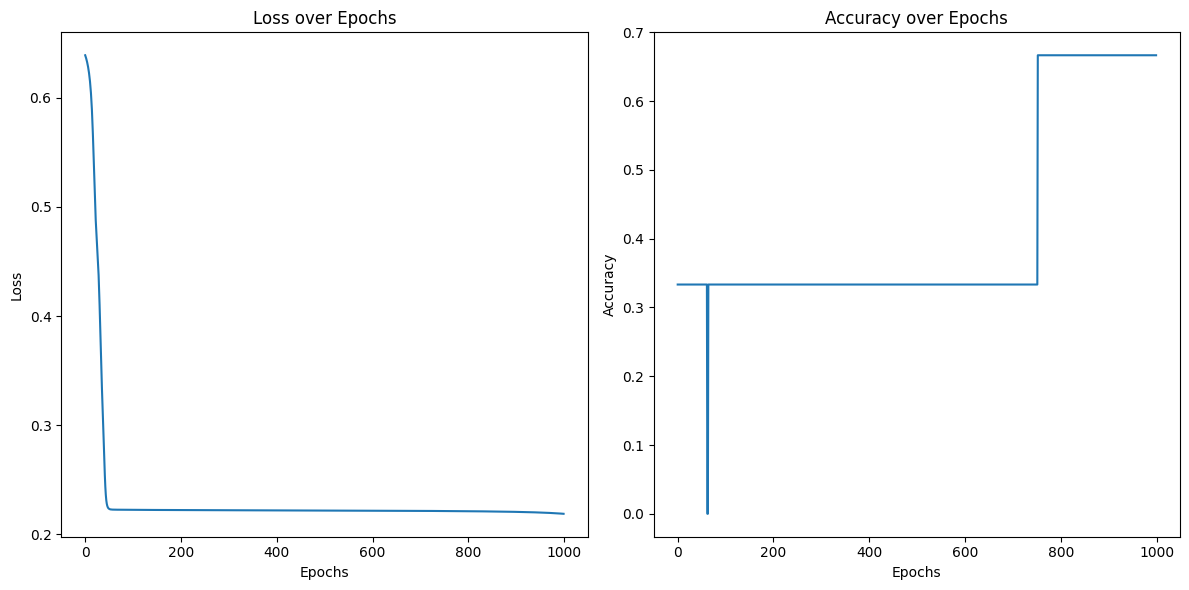

In [3]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]).reshape(5, 6)
B = np.array([1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]).reshape(5, 6)
C = np.array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]).reshape(5, 6)

target_A = np.array([1, 0, 0])  
target_B = np.array([0, 1, 0])  
target_C = np.array([0, 0, 1])  

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

np.random.seed(0)
weights1 = np.random.rand(30, 10) 
weights2 = np.random.rand(10, 3)   
bias1 = np.zeros((1, 10))  
bias2 = np.zeros((1, 3))  

learning_rate = 0.1
n_epochs = 1000

losses = []
accuracies = []
for epoch in range(n_epochs):
    hidden_layer_A = sigmoid(np.dot(A.flatten(), weights1) + bias1)
    output_layer_A = sigmoid(np.dot(hidden_layer_A, weights2) + bias2)
    
    hidden_layer_B = sigmoid(np.dot(B.flatten(), weights1) + bias1)
    output_layer_B = sigmoid(np.dot(hidden_layer_B, weights2) + bias2)
    
    hidden_layer_C = sigmoid(np.dot(C.flatten(), weights1) + bias1)
    output_layer_C = sigmoid(np.dot(hidden_layer_C, weights2) + bias2)
    
    output_error_A = target_A - output_layer_A
    output_delta_A = output_error_A * sigmoid_derivative(output_layer_A)
    
    output_error_B = target_B - output_layer_B
    output_delta_B = output_error_B * sigmoid_derivative(output_layer_B)
    
    output_error_C = target_C - output_layer_C
    output_delta_C = output_error_C * sigmoid_derivative(output_layer_C)

    weights2 += learning_rate * (np.outer(hidden_layer_A, output_delta_A) + np.outer(hidden_layer_B, output_delta_B) + np.outer(hidden_layer_C, output_delta_C))
    
    hidden_error_A = np.dot(output_delta_A, weights2.T)
    hidden_error_B = np.dot(output_delta_B, weights2.T)
    hidden_error_C = np.dot(output_delta_C, weights2.T)
    
    weights1 += learning_rate * (np.outer(A.flatten(), hidden_error_A * sigmoid_derivative(hidden_layer_A)) + 
                                 np.outer(B.flatten(), hidden_error_B * sigmoid_derivative(hidden_layer_B)) + 
                                 np.outer(C.flatten(), hidden_error_C * sigmoid_derivative(hidden_layer_C)))
    
    bias2 += learning_rate * (output_delta_A + output_delta_B + output_delta_C)
    bias1 += learning_rate * (np.sum(hidden_error_A * sigmoid_derivative(hidden_layer_A), axis=0, keepdims=True) + 
                              np.sum(hidden_error_B * sigmoid_derivative(hidden_layer_B), axis=0, keepdims=True) + 
                              np.sum(hidden_error_C * sigmoid_derivative(hidden_layer_C), axis=0, keepdims=True))
    
    loss = np.mean((output_error_A ** 2 + output_error_B ** 2 + output_error_C ** 2)) / 3  
    losses.append(loss)
    
    predicted_A = np.argmax(output_layer_A)
    predicted_B = np.argmax(output_layer_B)
    predicted_C = np.argmax(output_layer_C)
    
    accuracy_A = 1 if predicted_A == np.argmax(target_A) else 0
    accuracy_B = 1 if predicted_B == np.argmax(target_B) else 0
    accuracy_C = 1 if predicted_C == np.argmax(target_C) else 0
    
    accuracy = (accuracy_A + accuracy_B + accuracy_C) / 3
    accuracies.append(accuracy)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

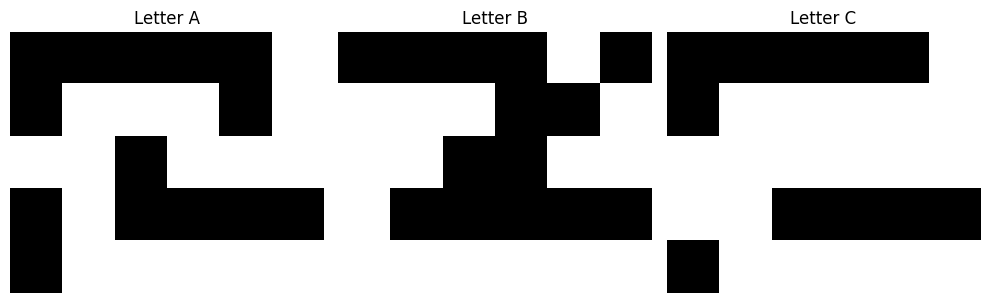

In [4]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]).reshape(5, 6)
B = np.array([1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]).reshape(5, 6)
C = np.array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]).reshape(5, 6)

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(A, cmap='binary')
plt.title('Letter A')
plt.axis('off')  

plt.subplot(1, 3, 2)
plt.imshow(B, cmap='binary')
plt.title('Letter B')
plt.axis('off')  

plt.subplot(1, 3, 3)
plt.imshow(C, cmap='binary')
plt.title('Letter C')
plt.axis('off')  

plt.tight_layout()
plt.show()

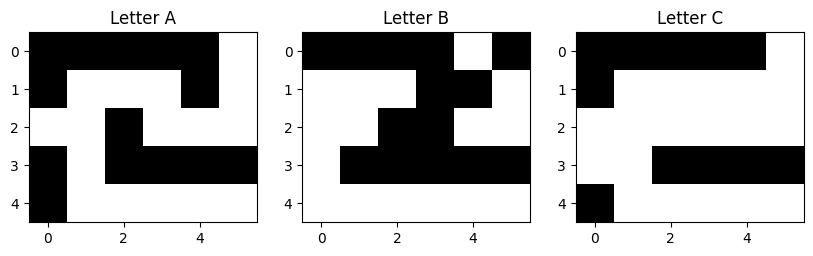

Output for A: [[0.95938592 0.03128464 0.02613213]]
Output for B: [[0.03288797 0.9597902  0.02315714]]
Output for C: [[0.02619484 0.02535412 0.96350615]]


In [5]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]).reshape(5, 6)
B = np.array([1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]).reshape(5, 6)
C = np.array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]).reshape(5, 6)

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(A, cmap='binary')
plt.title('Letter A')

plt.subplot(1, 3, 2)
plt.imshow(B, cmap='binary')
plt.title('Letter B')

plt.subplot(1, 3, 3)
plt.imshow(C, cmap='binary')
plt.title('Letter C')

plt.show()

n_inputs = 30  
n_hidden = 10  
n_outputs = 3  

learning_rate = 0.1
n_iterations = 10000

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

X = np.array([A.flatten(), B.flatten(), C.flatten()])
y = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])  

np.random.seed(0)
weights1 = np.random.rand(n_inputs, n_hidden)
weights2 = np.random.rand(n_hidden, n_outputs)
bias1 = np.zeros((1, n_hidden))
bias2 = np.zeros((1, n_outputs))

for iteration in range(n_iterations):
    hidden_layer = sigmoid(np.dot(X, weights1) + bias1)
    output_layer = sigmoid(np.dot(hidden_layer, weights2) + bias2)
    
    output_error = y - output_layer
    output_delta = output_error * sigmoid_derivative(output_layer)
    
    hidden_error = np.dot(output_delta, weights2.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_layer)
    
    weights2 += learning_rate * np.dot(hidden_layer.T, output_delta)
    weights1 += learning_rate * np.dot(X.T, hidden_delta)
    bias2 += learning_rate * np.sum(output_delta, axis=0, keepdims=True)
    bias1 += learning_rate * np.sum(hidden_delta, axis=0, keepdims=True)

# T
def test_network(image):
    hidden_layer = sigmoid(np.dot(image.flatten(), weights1) + bias1)
    output_layer = sigmoid(np.dot(hidden_layer, weights2) + bias2)
    return output_layer

# Test the network with all letters
print("Output for A:", test_network(A))
print("Output for B:", test_network(B))
print("Output for C:", test_network(C))